In [17]:
import scvelo as scv
import numpy as np
import matplotlib.pyplot as plt

scvelo has some standard datasets included, e.g. one about pancreatic endocrinogenesis. The package is for velocity analysis but in the inital stage we can use any scRNA-seq dataset.

In [2]:
anndata = scv.datasets.pancreatic_endocrinogenesis()
anndata

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50.0M/50.0M [00:09<00:00, 5.36MB/s]


AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

In [18]:
umap = anndata.obsm['X_umap']

In [25]:
anndata.obs.clusters

index
AAACCTGAGAGGGATA    Pre-endocrine
AAACCTGAGCCTTGAT           Ductal
AAACCTGAGGCAATTA            Alpha
AAACCTGCATCATCCC           Ductal
AAACCTGGTAAGTGGC     Ngn3 high EP
                        ...      
TTTGTCAAGTGACATA    Pre-endocrine
TTTGTCAAGTGTGGCA     Ngn3 high EP
TTTGTCAGTTGTTTGG           Ductal
TTTGTCATCGAATGCT            Alpha
TTTGTCATCTGTTTGT          Epsilon
Name: clusters, Length: 3696, dtype: category
Categories (8, object): ['Ductal', 'Ngn3 low EP', 'Ngn3 high EP', 'Pre-endocrine', 'Beta', 'Alpha', 'Delta', 'Epsilon']

In [28]:
anndata.uns.clusters_colors

AttributeError: 'dict' object has no attribute 'clusters_colors'

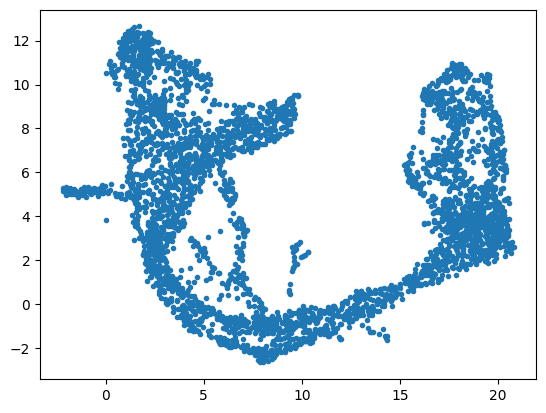

In [23]:
plt.plot(umap[:,0], umap[:,1], '.')

In [27]:
anndata.shape[0]

3696

In [3]:
anndata.obs

,clusters_coarse,clusters,S_score,G2M_score
index,,,,
AAACCTGAGAGGGATA,Pre-endocrine,Pre-endocrine,-0.224902,-0.252071
AAACCTGAGCCTTGAT,Ductal,Ductal,-0.014707,-0.232610
AAACCTGAGGCAATTA,Endocrine,Alpha,-0.171255,-0.286834
AAACCTGCATCATCCC,Ductal,Ductal,0.599244,0.191243
AAACCTGGTAAGTGGC,Ngn3 high EP,Ngn3 high EP,-0.179981,-0.126030
...,...,...,...,...
TTTGTCAAGTGACATA,Pre-endocrine,Pre-endocrine,-0.235896,-0.266101
TTTGTCAAGTGTGGCA,Ngn3 high EP,Ngn3 high EP,0.279374,-0.204047
TTTGTCAGTTGTTTGG,Ductal,Ductal,-0.045692,-0.208907


In [23]:
per = np.random.permutation(3696)

In [25]:
anndata[per]

View of AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

In [6]:
anndata.var.index.values

array(['Xkr4', 'Gm37381', 'Rp1', ..., 'Gm29504', 'Gm20837', 'Erdr1'],
      dtype=object)

The spliced count `anndata.layers['spliced']` or later the transformed `anndata.X` (e.g. when we want to use the normalized and logarithmized data) is the one we're interested in.

In [3]:
# The spliced count of the first cell with 2356 non-zero genes out of 27998
anndata.layers['spliced'][0]

<1x27998 sparse matrix of type '<class 'numpy.float32'>'
	with 2356 stored elements in Compressed Sparse Row format>

As sensible preprocessing step we can filter out all genes which were counted less than 10 times with `filter_and_normalize`. This reduces the number of genes from 27998 down to 8357.

In [4]:
scvelo.pp.filter_and_normalize(anndata, min_shared_counts=10, n_top_genes=2400, flavor='cell_ranger', log=True)

Filtered out 19641 genes that are detected 10 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2400 highly variable genes.
Logarithmized X.


In [7]:
anndata.X.toarray().sum(axis=1)

array([619.51575, 519.5526 , 571.0186 , ..., 502.96722, 531.537  ,
       633.9243 ], dtype=float32)

In [5]:
# The spliced count of the first cell with 2030 non-zero genes out of 8357
anndata.layers['spliced'][0]

<1x8357 sparse matrix of type '<class 'numpy.float32'>'
	with 2030 stored elements in Compressed Sparse Row format>

`scvelo` also directly calculates the highly variable genes:

In [9]:
highly_varaible_genes = []
for gene in anndata.var['highly_variable_genes'].index:
    if anndata.var['highly_variable_genes'][gene] == 'True':
        highly_varaible_genes.append(gene)

In [29]:
len(highly_varaible_genes)
highly_varaible_genes

['Sntg1',
 'Cops5',
 'Sbspon',
 'Pkhd1',
 'Mcm3',
 'Fam135a',
 'Adgrb3',
 'Zfp451',
 'Tbc1d8',
 'Fhl2',
 'Slc40a1',
 'Pms1',
 'Pgap1',
 'Ankrd44',
 'Tyw5',
 'Raph1',
 'Klf7',
 'Akr1cl',
 'Ikzf2',
 'Fn1',
 'March4',
 'Igfbp5',
 'Tns1',
 'Tmbim1',
 'Fev',
 'Cryba2',
 'Tuba4a',
 'Ptprn',
 'Resp18',
 'Epha4',
 'Dock10',
 'Sphkap',
 'Dner',
 'Hjurp',
 'Hes6',
 'Myeov2',
 'Kif1a',
 'Pam',
 'Bcl2',
 'Dbi',
 'Tmem163',
 'Mcm6',
 'Nfasc',
 'Atp2b4',
 'Btg2',
 'Adora1',
 'Timm17a',
 'Nav1',
 'Trove2',
 'Rgs2',
 'Swt1',
 'Rgl1',
 'Lamc1',
 'Npl',
 'Xpr1',
 'Qsox1',
 'Fam163a',
 'Soat1',
 'Pappa2',
 'Dars2',
 'Fmo1',
 'Fmo2',
 'BC055324',
 'Atp1b1',
 'Mpzl1',
 'Pea15a',
 'Cep170',
 'Akt3',
 'Enah',
 'Capn2',
 'Tgfb2',
 'Cenpf',
 'Prox1',
 'Atf3',
 'Dtl',
 'St18',
 'Cspp1',
 'Sulf1',
 'Kcnb2',
 'Gdap1',
 'Gsta3',
 'Col9a1',
 'Khdrbs2',
 'Dst',
 'Ptpn18',
 'Hs6st1',
 'Cox5b',
 'Inpp4a',
 'Il1r1',
 'Wdr75',
 'Coq10b',
 'Plcl1',
 'Zdbf2',
 'Adam23',
 'Map2',
 'Unc80',
 'Igfbp2',
 'Vil1',
 'Bcs1l',
 'D

In [42]:
np.unique(anndata.X.toarray())

array([0.        , 0.28846455, 0.293713  , ..., 7.1136084 , 7.2068896 ,
       7.306362  ], dtype=float32)

In [34]:
anndata.X[:,'Arl8a']

IndexError: Index dimension must be 1 or 2

In [47]:
anndata.var

,highly_variable_genes,gene_count_corr
index,,
Mrpl15,False,0.0448
Sntg1,True,-0.0226
Vcpip1,False,0.0008
Snhg6,False,-0.0037
Cops5,True,-0.0346
...,...,...
Arhgap6,False,0.0794
Uty,False,-0.0269
Ddx3y,True,-0.0484


In [4]:
bone = scvelo.datasets.pbmc68k()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118M/118M [00:18<00:00, 6.69MB/s]


In [6]:
bone.obs

,celltype
AAACATACACCCAA,CD8+ Cytotoxic T
AAACATACCCCTCA,CD8+/CD45RA+ Naive Cytotoxic
AAACATACCGGAGA,CD4+/CD45RO+ Memory
AAACATACTAACCG,CD19+ B
AAACATACTCTTCA,CD4+/CD25 T Reg
...,...
TTTGCATGAGCCTA,CD8+ Cytotoxic T
TTTGCATGCTAGCA,CD8+/CD45RA+ Naive Cytotoxic
TTTGCATGCTGCAA,CD8+ Cytotoxic T
TTTGCATGGCTCCT,CD8+ Cytotoxic T
